In [71]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [72]:
# read fold for check
f1 = pd.read_csv("../5-fold_new/fold1.csv")
f2 = pd.read_csv("../5-fold_new/fold2.csv")
f3 = pd.read_csv("../5-fold_new/fold3.csv")
f4 = pd.read_csv("../5-fold_new/fold4.csv")
f5 = pd.read_csv("../5-fold_new/fold5.csv")

# read raw data
raw_data = pd.read_csv("../raw_data/data.csv")

# Review

In [73]:
# run it once
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [74]:
print("########## the fold ############")
print("fold1: "+ str(len(f1)))
print("fold2: "+ str(len(f2)))
print("fold3: "+ str(len(f3)))
print("fold4: "+ str(len(f4)))
print("fold5: "+ str(len(f5)))
print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
print("################################")

########## the fold ############
fold1: 91
fold2: 91
fold3: 91
fold4: 91
fold5: 91

total: 455
################################


In [75]:
y_f1 = f1[f1.columns[1]]
le = LabelEncoder()
y_f1 = np.array(le.fit_transform(y_f1))
print("y_f1:", le.classes_)
y_f2 = f2[f2.columns[1]]
le = LabelEncoder()
y_f2 = np.array(le.fit_transform(y_f2))
print("y_f2:",le.classes_)
y_f3 = f3[f3.columns[1]]
le = LabelEncoder()
y_f3 = np.array(le.fit_transform(y_f3))
print("y_f3:",le.classes_)
y_f4 = f4[f4.columns[1]]
le = LabelEncoder()
y_f4 = np.array(le.fit_transform(y_f4))
print("y_f4:",le.classes_)
y_f5 = f5[f5.columns[1]]
le = LabelEncoder()
y_f5 = np.array(le.fit_transform(y_f5))
print("y_f5:",le.classes_)

y_f1: ['B' 'M']
y_f2: ['B' 'M']
y_f3: ['B' 'M']
y_f4: ['B' 'M']
y_f5: ['B' 'M']


In [76]:
# check balance in each fold
print("------ fold ------")
print("f1 positive: " + str(sum(y_f1)))
print("f1 negative: " + str(len(f1) - sum(y_f1)))
print("------------------")
print("f2 positive: " + str(sum(y_f2)))
print("f2 negative: " + str(len(f2) - sum(y_f2)))
print("------------------")
print("f3 positive: " + str(sum(y_f3)))
print("f3 negative: " + str(len(f3) - sum(y_f3)))
print("------------------")
print("f4 positive: " + str(sum(y_f4)))
print("f4 negative: " + str(len(f4) - sum(y_f4)))
print("------------------")
print("f5 positive: " + str(sum(y_f5)))
print("f5 negative: " + str(len(f5) - sum(y_f5)))
print("------------------")

------ fold ------
f1 positive: 39
f1 negative: 52
------------------
f2 positive: 38
f2 negative: 53
------------------
f3 positive: 25
f3 negative: 66
------------------
f4 positive: 19
f4 negative: 72
------------------
f5 positive: 23
f5 negative: 68
------------------


# Split1

In [77]:
# setting split and path
split = 'split1'
path = "../5-fold_new/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
test_path =  "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [78]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../5-fold_new/DATA//split1/train/train_split1.csv
../5-fold_new/DATA//test.csv
../5-fold_new/DATA//split1/val/val_split1.csv


In [79]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [80]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [81]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [82]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [83]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split1
train positive:    105
validate positive: 39


In [84]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [85]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [86]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [87]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [88]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split1
Train have abnormal: 105
Train have normal: 259
 * Train difference: 154
Validate have abnormal: 39
Validate have normal: 52
 * Validate difference: 13
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split1

In [89]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [90]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [91]:
dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2
                                , 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_raw, y_raw)
print('Best criterion parameter:', grid_search.best_params_['criterion'])
print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
print('Best splitter parameter:', grid_search.best_params_['splitter'])
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Best criterion parameter: entropy
Best max_depth parameter: 16
Best min_samples_leaf parameter: 4
Best min_samples_split parameter: 6
Best splitter parameter: random
Best score: 0.9648812296227295


In [92]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [95]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=16, min_samples_leaf=4, min_samples_split=6, splitter="random")

In [96]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [97]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

## step eval - split1

In [98]:
# tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [99]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [100]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [101]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [102]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [103]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

split1
############## validate set ################
Confusion Matrix
----------------
[[48  4]
 [ 6 33]] 

----------------
Sensitivity: 84.62%
Specificity: 92.31%
Accuracy: 89.01%
Precision: 89.19%
Sensitivity: 84.62%
Precision: 89.19%
F1: 86.84%


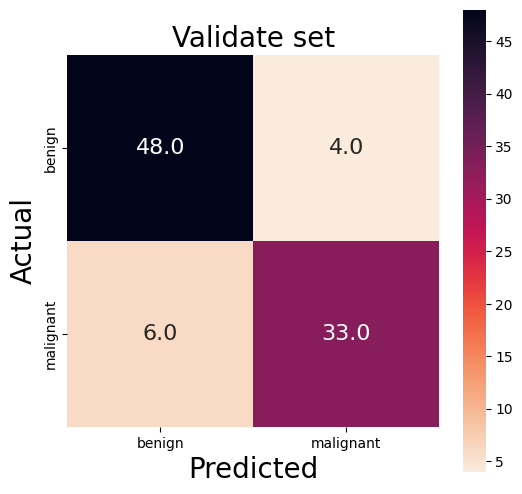

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [25 43]] 

----------------
Sensitivity: 63.24%
Specificity: 100.00%
Accuracy: 78.07%
Precision: 100.00%
Sensitivity: 63.24%
Precision: 100.00%
F1: 77.48%


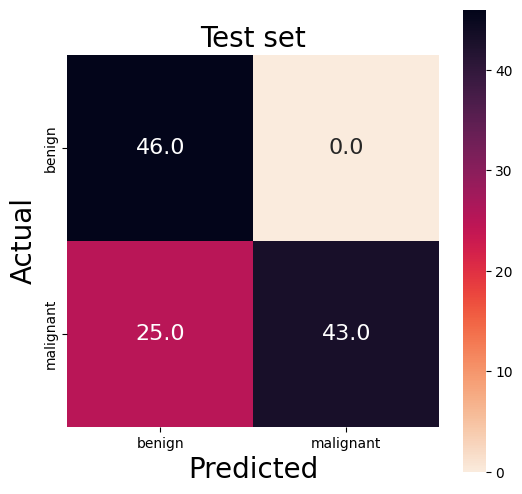

---------------------------------------
AUC validate: 0.8846
AUC test: 0.8162


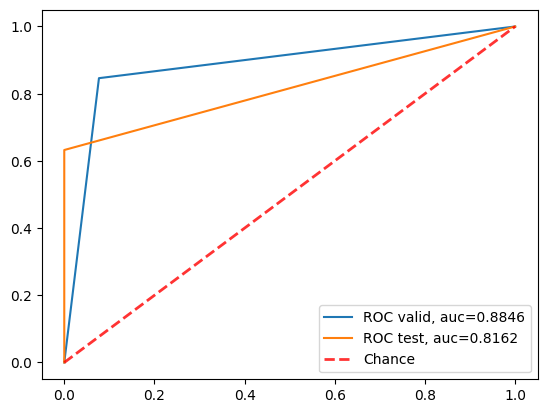

In [105]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = dtc.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = dtc.predict(x_test)
# Print the predictions
# print(y_pred) # marked

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split1,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix])) # marked
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix])) # marked
# thresholds_ = thr[ix] # marked
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red') # marked
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3)) # marked
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4)) # marked
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5)) # marked
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
################################################

# Split2

In [132]:
# setting split and path
split = 'split2'
path = "../5-fold_new/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [133]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../5-fold_new/DATA//split2/train/train_split2.csv
../5-fold_new/DATA//test.csv
../5-fold_new/DATA//split2/val/val_split2.csv


In [134]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [135]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [136]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [137]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [138]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split2
train positive:    106
validate positive: 38


In [139]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [140]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [141]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [142]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [143]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split2
Train have abnormal: 106
Train have normal: 258
 * Train difference: 152
Validate have abnormal: 38
Validate have normal: 53
 * Validate difference: 15
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split2

In [144]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [145]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [149]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [150]:
# grid_search_dt.best_params_

In [151]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=16, min_samples_leaf=4, min_samples_split=6, splitter="random")

In [152]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [153]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

## step eval - split2

In [154]:
# tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [155]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [156]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [157]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [158]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [159]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

split2
############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 9 29]] 

----------------
Sensitivity: 76.32%
Specificity: 100.00%
Accuracy: 90.11%
Precision: 100.00%
Sensitivity: 76.32%
Precision: 100.00%
F1: 86.57%


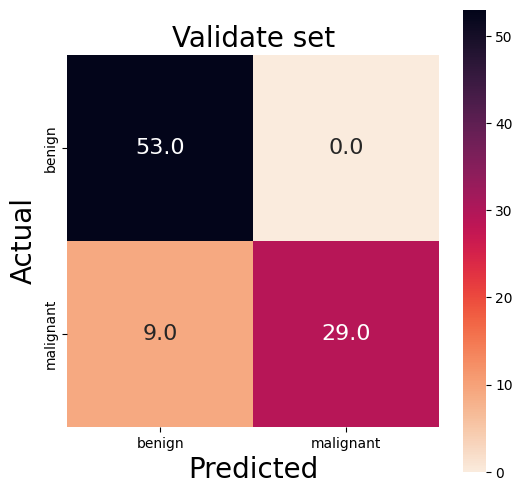

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [22 46]] 

----------------
Sensitivity: 63.24%
Specificity: 100.00%
Accuracy: 78.07%
Precision: 100.00%
Sensitivity: 63.24%
Precision: 100.00%
F1: 77.48%


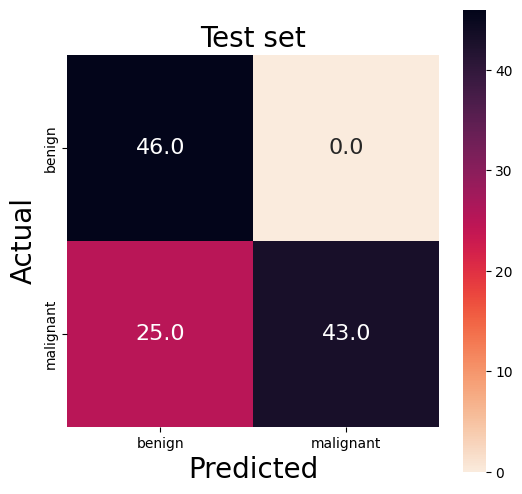

---------------------------------------
AUC validate: 0.8816
AUC test: 0.8382


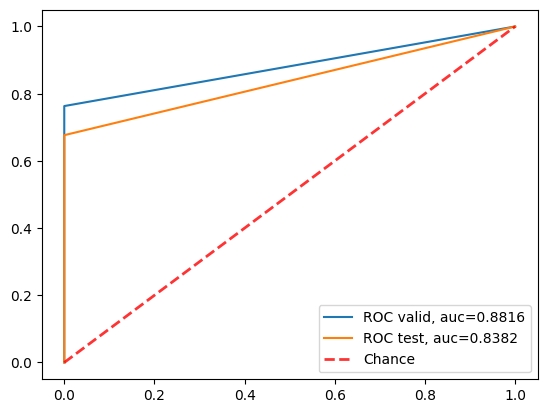

In [160]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = dtc.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = dtc.predict(x_test)
# Print the predictions
# print(y_pred) # marked

# Confusion matrix
cm_test_split2 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split2,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix])) # marked
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix])) # marked
# thresholds_ = thr[ix] # marked
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red') # marked
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3)) # marked
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4)) # marked
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5)) # marked
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
################################################

# Split3

In [ ]:
# setting split and path
split = 'split3'
path = "../5-fold_new/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [ ]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

In [ ]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

In [ ]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

In [ ]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

In [ ]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

In [ ]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

In [ ]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

In [ ]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [ ]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [ ]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

## step train - split3

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [ ]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [ ]:
# grid_search_dt.best_params_

In [161]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=16, min_samples_leaf=4, min_samples_split=6, splitter="random")

In [162]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [163]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

## step eval - split3

In [164]:
# tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [165]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [166]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [167]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [168]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [169]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

split2
############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [10 28]] 

----------------
Sensitivity: 73.68%
Specificity: 100.00%
Accuracy: 89.01%
Precision: 100.00%
Sensitivity: 73.68%
Precision: 100.00%
F1: 84.85%


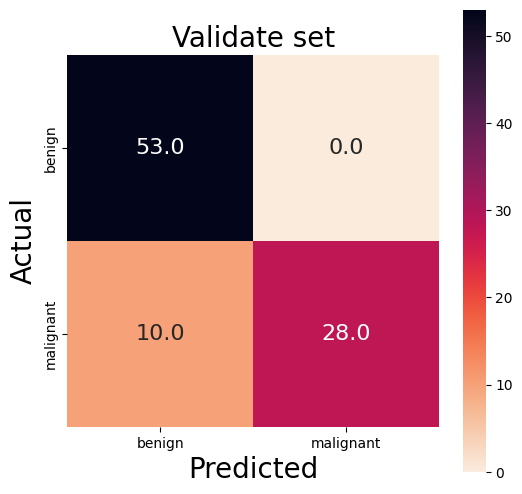

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [26 42]] 

----------------
Sensitivity: 63.24%
Specificity: 100.00%
Accuracy: 78.07%
Precision: 100.00%
Sensitivity: 63.24%
Precision: 100.00%
F1: 77.48%


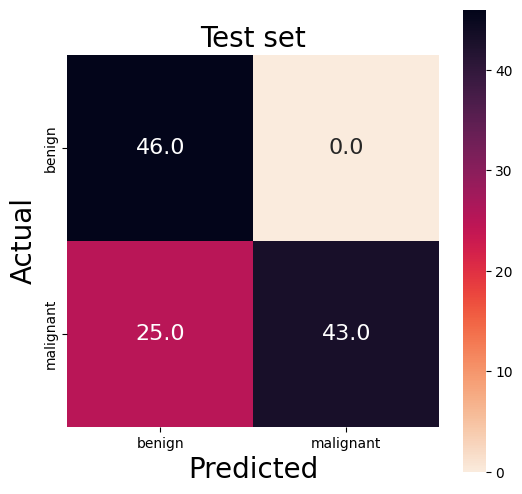

---------------------------------------
AUC validate: 0.8684
AUC test: 0.8088


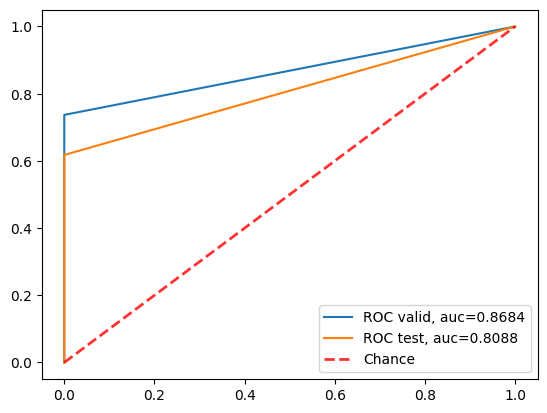

In [170]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = dtc.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = dtc.predict(x_test)
# Print the predictions
# print(y_pred) # marked

# Confusion matrix
cm_test_split3 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split3,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix])) # marked
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix])) # marked
# thresholds_ = thr[ix] # marked
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red') # marked
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3)) # marked
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4)) # marked
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5)) # marked
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
################################################

# Split4

In [171]:
# setting split and path
split = 'split4'
path = "../5-fold_new/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [172]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../5-fold_new/DATA//split4/train/train_split4.csv
../5-fold_new/DATA//test.csv
../5-fold_new/DATA//split4/val/val_split4.csv


In [173]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [174]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [175]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [176]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [177]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split4
train positive:    125
validate positive: 19


In [178]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [179]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [180]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [181]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [182]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split4
Train have abnormal: 125
Train have normal: 239
 * Train difference: 114
Validate have abnormal: 19
Validate have normal: 72
 * Validate difference: 53
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split4

In [183]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [184]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [185]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [186]:
# grid_search_dt.best_params_

In [187]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=16, min_samples_leaf=4, min_samples_split=6, splitter="random")

In [188]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [189]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

## step eval - split4

In [190]:
# tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [191]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [192]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [193]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [194]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [195]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

split4
############## validate set ################
Confusion Matrix
----------------
[[67  5]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 93.06%
Accuracy: 94.51%
Precision: 79.17%
Sensitivity: 100.00%
Precision: 79.17%
F1: 88.37%


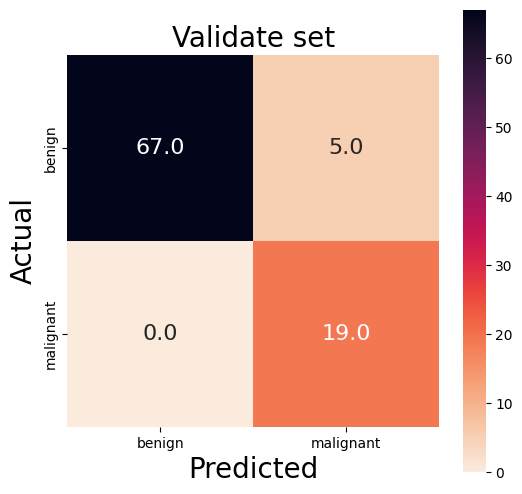

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [25 43]] 

----------------
Sensitivity: 63.24%
Specificity: 100.00%
Accuracy: 78.07%
Precision: 100.00%
Sensitivity: 63.24%
Precision: 100.00%
F1: 77.48%


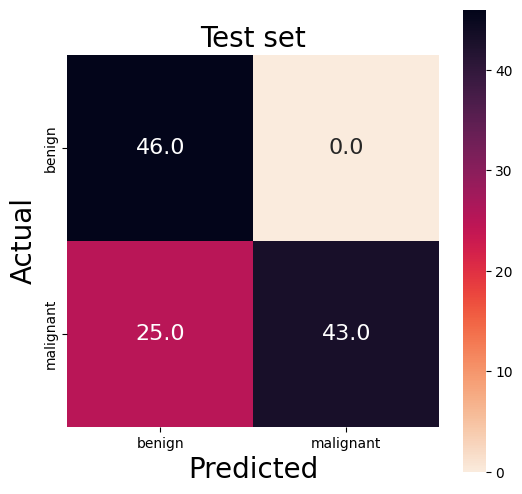

---------------------------------------
AUC validate: 0.9653
AUC test: 0.8162


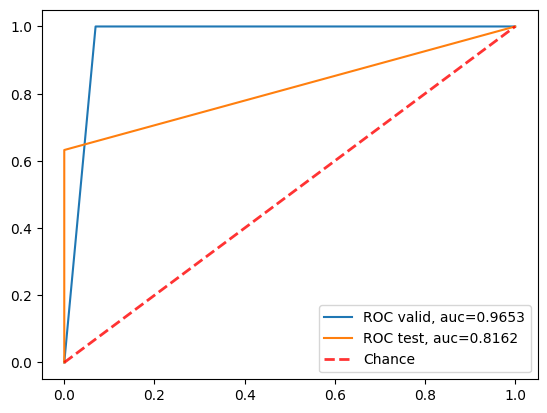

In [196]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = dtc.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = dtc.predict(x_test)
# Print the predictions
# print(y_pred) # marked

# Confusion matrix
cm_test_split4 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split4,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix])) # marked
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix])) # marked
# thresholds_ = thr[ix] # marked
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red') # marked
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3)) # marked
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4)) # marked
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5)) # marked
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
################################################

# Split5

In [197]:
# setting split and path
split = 'split5'
path = "../5-fold_new/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [198]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../5-fold_new/DATA//split5/train/train_split5.csv
../5-fold_new/DATA//test.csv
../5-fold_new/DATA//split5/val/val_split5.csv


In [199]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [200]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [201]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [202]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [203]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split5
train positive:    121
validate positive: 23


In [204]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [205]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [206]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [207]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [208]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split5
Train have abnormal: 121
Train have normal: 243
 * Train difference: 122
Validate have abnormal: 23
Validate have normal: 68
 * Validate difference: 45
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split5

In [209]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [210]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [211]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [212]:
# grid_search_dt.best_params_

In [213]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=16, min_samples_leaf=4, min_samples_split=6, splitter="random")

In [214]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [215]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

## step eval - split5

In [216]:
# tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [217]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [218]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [219]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [220]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [221]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

split5
############## validate set ################
Confusion Matrix
----------------
[[63  5]
 [ 1 22]] 

----------------
Sensitivity: 95.65%
Specificity: 92.65%
Accuracy: 93.41%
Precision: 81.48%
Sensitivity: 95.65%
Precision: 81.48%
F1: 88.00%


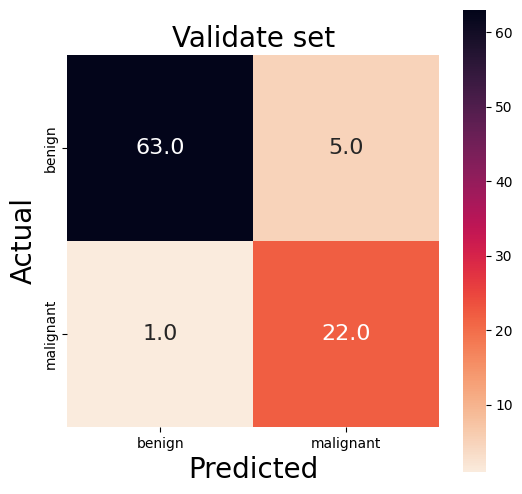

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [19 49]] 

----------------
Sensitivity: 63.24%
Specificity: 100.00%
Accuracy: 78.07%
Precision: 100.00%
Sensitivity: 63.24%
Precision: 100.00%
F1: 77.48%


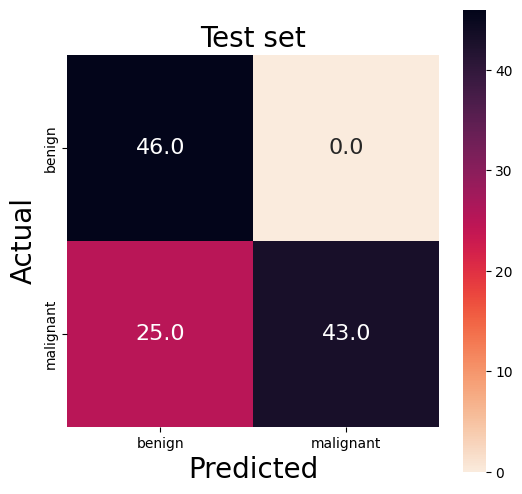

---------------------------------------
AUC validate: 0.9415
AUC test: 0.8603


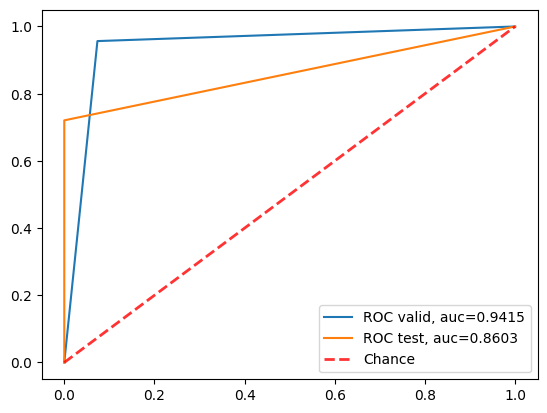

In [222]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = dtc.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_score_val = f1(cm_val)

# plot confusion matrix
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Validate set", fontsize=20)
ax = sns.heatmap(cm_val, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = dtc.predict(x_test)
# Print the predictions
# print(y_pred) # marked

# Confusion matrix
cm_test_split5 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split5,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_score_test = f1(cm_test)

# plot confusion matrix
# label = ['benign','malignant']
plt.figure(figsize=(6, 6))
plt.title("Test set", fontsize=20)
ax = sns.heatmap(cm_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = metrics.roc_curve(y_val,  y_pred_val)
auc1 = metrics.roc_auc_score(y_val,  y_pred_val)
fpr2, tpr2, thr2 = metrics.roc_curve(y_test,  y_pred_test)
auc2 = metrics.roc_auc_score(y_test,  y_pred_test)
gmeans2 = np.sqrt(tpr2 * (1-fpr2))
ix2 = np.argmax(gmeans2)
import sklearn.metrics as metrics
# print('Best Threshold ' + str(i) + ' =%f, G-Mean=%.4f' % (thr[ix], gmeans[ix])) # marked
# print('FPR: %.4f, TPR: %.4f' %(fpr[ix], tpr[ix])) # marked
# thresholds_ = thr[ix] # marked
print("---------------------------------------")
print("AUC validate: %.4f" % auc1)
print("AUC test: %.4f" % auc2)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red') # marked
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc2))
# plt.plot(fpr3,tpr3,label="ROC fold 3, auc="+str("%.4f" % auc3)) # marked
# plt.plot(fpr4,tpr4,label="ROC fold 4, auc="+str("%.4f" % auc4)) # marked
# plt.plot(fpr5,tpr5,label="ROC fold 5, auc="+str("%.4f" % auc5)) # marked
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

plt.legend(loc=4)
plt.show()
################################################

# Compare

In [223]:
test_split1 = np.array([[12, 1], [12, 12]])
test_split2 = np.array([[13, 0], [13, 1]])
test_split3 = np.array([[10, 4], [5, 9]])
test_split4 = np.array([[13, 0], [11, 8]])
test_split5 = np.array([[6, 10], [3, 21]])

In [224]:
# test_split5

In [225]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
overall_test

array([[54, 15],
       [44, 51]])

In [226]:
overall_cm_test = cm_test_split1 + cm_test_split2 + cm_test_split3 + cm_test_split4 + cm_test_split5
overall_cm_test

array([[230,   0],
       [117, 223]], dtype=int64)

Text(0.5, 81.72222222222219, 'Predicted')

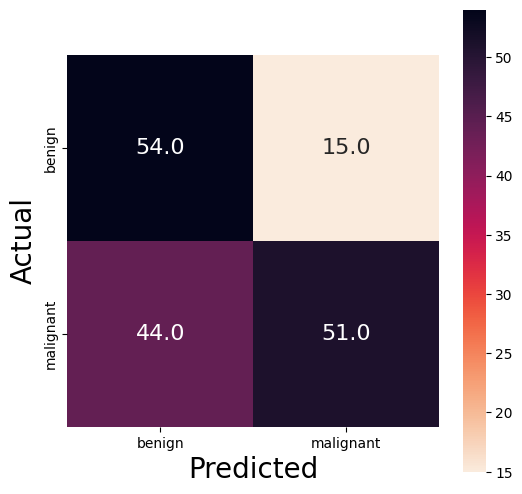

In [227]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [228]:
sen_split1 = sensitivity(cm_test_split1)
sen_split2 = sensitivity(cm_test_split2)
sen_split3 = sensitivity(cm_test_split3)
sen_split4 = sensitivity(cm_test_split4)
sen_split5 = sensitivity(cm_test_split5)
sen_overall = sensitivity(overall_cm_test)

Sensitivity: 63.24%
Sensitivity: 67.65%
Sensitivity: 61.76%
Sensitivity: 63.24%
Sensitivity: 72.06%
Sensitivity: 65.59%


In [229]:
spec_split1 = specificity(cm_test_split1)
spec_split2 = specificity(cm_test_split2)
spec_split3 = specificity(cm_test_split3)
spec_split4 = specificity(cm_test_split4)
spec_split5 = specificity(cm_test_split5)
spec_overall = specificity(overall_cm_test)

Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%


In [230]:
acc_split1 = accuracy(cm_test_split1)
acc_split2 = accuracy(cm_test_split2)
acc_split3 = accuracy(cm_test_split3)
acc_split4 = accuracy(cm_test_split4)
acc_split5 = accuracy(cm_test_split5)
acc_overall = accuracy(overall_cm_test)

Accuracy: 78.07%
Accuracy: 80.70%
Accuracy: 77.19%
Accuracy: 78.07%
Accuracy: 83.33%
Accuracy: 79.47%


In [231]:
pre_split1 = precision(cm_test_split1)
pre_split2 = precision(cm_test_split2)
pre_split3 = precision(cm_test_split3)
pre_split4 = precision(cm_test_split4)
pre_split5 = precision(cm_test_split5)
pre_overall = precision(overall_cm_test)

Precision: 100.00%
Precision: 100.00%
Precision: 100.00%
Precision: 100.00%
Precision: 100.00%
Precision: 100.00%


In [232]:
f1_split1 = f1(cm_test_split1)
f1_split2 = f1(cm_test_split2)
f1_split3 = f1(cm_test_split3)
f1_split4 = f1(cm_test_split4)
f1_split5 = f1(cm_test_split5)
f1_overall = f1(overall_cm_test)

Sensitivity: 63.24%
Precision: 100.00%
F1: 77.48%
Sensitivity: 67.65%
Precision: 100.00%
F1: 80.70%
Sensitivity: 61.76%
Precision: 100.00%
F1: 76.36%
Sensitivity: 63.24%
Precision: 100.00%
F1: 77.48%
Sensitivity: 72.06%
Precision: 100.00%
F1: 83.76%
Sensitivity: 65.59%
Precision: 100.00%
F1: 79.22%


In [233]:
# sensitivity_values = []

# sensitivity_values.append(sen_split1)
# sensitivity_values.append(sen_split2)
# sensitivity_values.append(sen_split3)
# sensitivity_values.append(sen_split4)
# sensitivity_values.append(sen_split5)

sensitivity_values = [41.66666666666667, 57.14285714285714, 42.857142857142854, 47.368421052631575, 54.166666666666664]
print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Mean Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[41.66666666666667, 57.14285714285714, 42.857142857142854, 47.368421052631575, 54.166666666666664]
Mean Sensitivity: 48.64035087719298
Sensitivity Standard Deviation: 6.8287691232126395
Mean Sensitivity: 48.64 ± 6.83%


In [234]:
specificity_values = []

specificity_values.append(spec_split1)
specificity_values.append(spec_split2)
specificity_values.append(spec_split3)
specificity_values.append(spec_split4)
specificity_values.append(spec_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Mean Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean Specificity: 100.0
Specificity Standard Deviation: 0.0
Mean Specificity: 100.00 ± 0.00%


In [235]:
accuracy_values = []

accuracy_values.append(acc_split1)
accuracy_values.append(acc_split2)
accuracy_values.append(acc_split3)
accuracy_values.append(acc_split4)
accuracy_values.append(acc_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Mean accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[78.0701754385965, 80.7017543859649, 77.19298245614034, 78.0701754385965, 83.33333333333334]
Mean accuracy: 79.47368421052632
accuracy Standard Deviation: 2.5271684720856062
Mean accuracy: 79.47 ± 2.53%


In [236]:
precision_values = []

precision_values.append(pre_split1)
precision_values.append(pre_split2)
precision_values.append(pre_split3)
precision_values.append(pre_split4)
precision_values.append(pre_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Mean precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean precision: 100.0
precision Standard Deviation: 0.0
Mean precision: 100.00 ± 0.00%


In [237]:
f1_values = []

f1_values.append(f1_split1)
f1_values.append(f1_split2)
f1_values.append(f1_split3)
f1_values.append(f1_split4)
f1_values.append(f1_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Mean f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[77.47747747747746, 80.70175438596492, 76.36363636363637, 77.47747747747746, 83.76068376068376]
Mean f1: 79.156205893048
f1 Standard Deviation: 3.0423937672740324
Mean f1: 79.16 ± 3.04%


In [238]:
auc_values = []

auc_values.append(71.79)
auc_values.append(28.57)
auc_values.append(68.37)
auc_values.append(73.28)
auc_values.append(49.22)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean Specificity:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Mean auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[71.79, 28.57, 68.37, 73.28, 49.22]
Mean Specificity: 58.246
auc Standard Deviation: 19.196940641675173
Mean auc: 58.25 ± 19.20%
